In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (15,9)

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
df1.describe

<bound method NDFrame.describe of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   

In [7]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
for feature in df1.columns:
    if df1[feature].isnull().sum() > 1:
        print("{} Feature has {}% Missing values ".format(feature,round(df1[feature].isnull().mean()*100,1)))

size Feature has 0.1% Missing values 
society Feature has 41.3% Missing values 
bath Feature has 0.5% Missing values 
balcony Feature has 4.6% Missing values 


In [12]:
df1 = df1.drop(columns='society')

In [13]:
df1.reset_index(drop= True, inplace =True)
df1

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [14]:
#removing NaN values from the dataset
df1.dropna(inplace =True)

#Reset the index
df1.reset_index(drop= True, inplace =True)

# Create another column with the name of 'bhk' containing only integer part of 'size' column
df1['bhk'] = df1['size'].str.split().str[0]
df1['bhk'].dropna(inplace = True)
df1['bhk'] = df1['bhk'].astype('int')

In [15]:
df1

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...,...
12705,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
12706,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
12707,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
12708,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [16]:
print(df1['total_sqft'].iloc[[27]])

# Function to replace a range of values with their average
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

27    2100 - 2850
Name: total_sqft, dtype: object


In [17]:
# Applying the function to the column: - 'total_sqft'
df1.total_sqft = df1.total_sqft.apply(convert_sqft_to_num)

# Taking only the Numeric values from the data and storing it in df2
df2 = df1[df1.total_sqft.notnull()]

df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [18]:
##removing invalid data entry
## Example: The total sqft divided by the number of bhk should always be more than 300

df2 = df2[~(df2.total_sqft/df2.bhk<200)]
df2.shape

(12386, 9)

In [19]:
# Dividing the dataset into Continuous and Categorical variables:
cont_ = df2.select_dtypes(exclude = 'object')
cat_ = df2.select_dtypes(include  = 'object')

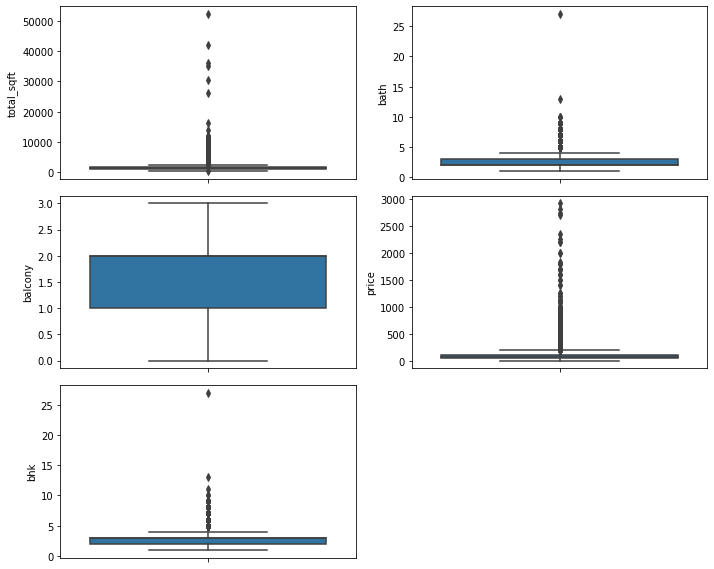

In [20]:
## displaying only the continuous variables from the dataset
## to determine the variables which have outliers and those which needs to be removed
fig = plt.figure(figsize = (10,8))
for index,col in enumerate(cont_):
    plt.subplot(3,2,index+1)
    sns.boxplot(y = cont_.loc[:,col])
fig.tight_layout(pad = 1.0)

In [21]:
df2 = df2.drop(df2[df2['bath']>6].index)
df2 = df2.drop(df2[df2['bhk']>7.0].index)

In [22]:
# Feature Engineering step
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [23]:
df2['price_per_sqft'].describe()

count     12286.000000
mean       6360.341494
std        4130.480074
min         267.829813
25%        4213.835592
50%        5302.325581
75%        6987.006759
max      176470.588235
Name: price_per_sqft, dtype: float64

In [24]:
## taking only the values with 1st Standard devaition values.
## as per Normal Distribution, 95% of our data lies within 1st Standard Deviation as per the location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)
df3.shape

(9192, 10)

<AxesSubplot:>

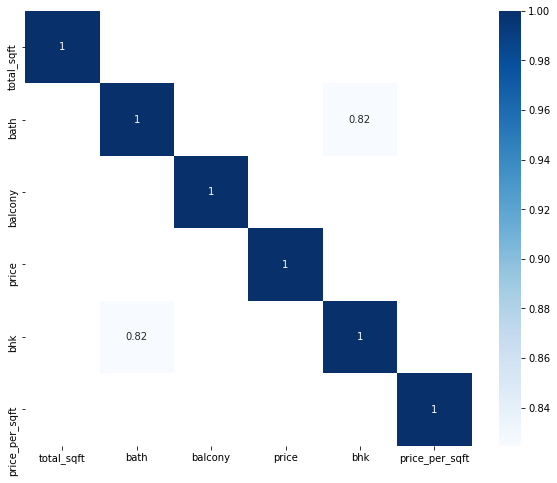

In [25]:
## finding correlation values within the dataset
## we remove features which are highly related to each other as they do not provide
## any significance value to our Model

corr = df3.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr,mask = corr<0.8 ,annot= True,cmap = 'Blues')

In [26]:
## checking the dataset with highest location data provided
## because havind values for a location less than 10 wont give us good information on the dataset

df3.location = df3.location.str.strip()
location_stats = df3['location'].value_counts(ascending=False)
location_stats

Whitefield             464
Sarjapur  Road         298
Electronic City        284
Kanakpura Road         191
Yelahanka              180
                      ... 
Bileshivale              1
Srinagar                 1
Kuvempu Nagar            1
Hunasamaranahalli        1
Mahaganapathy Nagar      1
Name: location, Length: 753, dtype: int64

In [27]:
# creating a Series of all the location having less than 10 entries against it  
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

NRI Layout             10
Kaikondrahalli         10
Rajiv Nagar            10
Sarakki Nagar          10
Dasanapura             10
                       ..
Bileshivale             1
Srinagar                1
Kuvempu Nagar           1
Hunasamaranahalli       1
Mahaganapathy Nagar     1
Name: location, Length: 575, dtype: int64

In [28]:
# using lambda function to name 'location_stats_less_than_10' as 'other' and then removing it

df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

df4 = df3[df3.location != 'other']

In [29]:
df4

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
3,Super built-up Area,18-May,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.00,3,3520.000000
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.00,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.00,2,6916.666667
6,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.00,2,3418.803419
7,Super built-up Area,Ready To Move,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.00,3,4561.403509
...,...,...,...,...,...,...,...,...,...,...
9182,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,2500.0,3.0,3.0,138.00,3,5520.000000
9183,Super built-up Area,Ready To Move,Yeshwanthpur,2 BHK,1160.0,2.0,2.0,64.08,2,5524.137931
9184,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,2503.0,3.0,3.0,138.00,3,5513.383939
9185,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,1855.0,3.0,3.0,135.00,3,7277.628032


In [30]:
## Keeping in mind that the number of Bathroom shouldn't be more than BHK+2
## Example for a 3 bhk, the number of bathrooms shouldn't be more than 5

df4 = df4[df4.bath<df4.bhk+2]

/home/mavin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


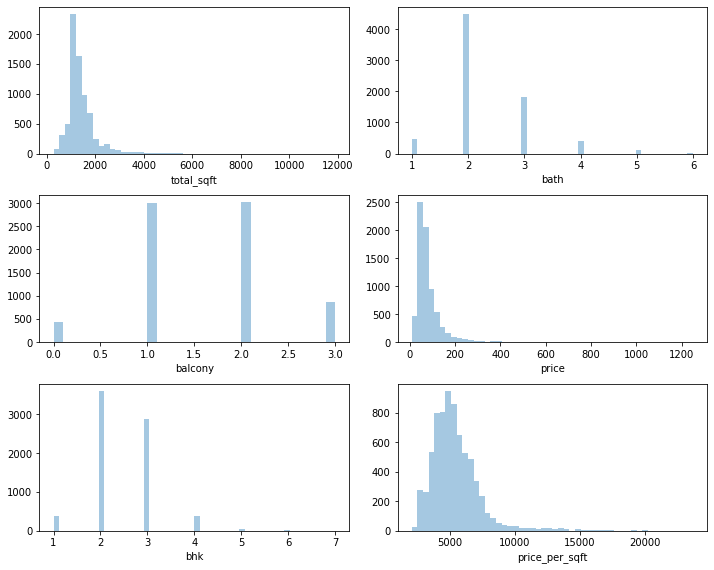

In [31]:
## representing Numerical Data and Visualizing the same usin Distplot to gain further info

num_ = df4.select_dtypes(exclude = 'object')
fig = plt.figure(figsize =(10,8))
for index, col in enumerate(num_):
    plt.subplot(3,2,index+1)
    sns.distplot(num_.loc[:,col],kde = False)
fig.tight_layout(pad = 1.0)

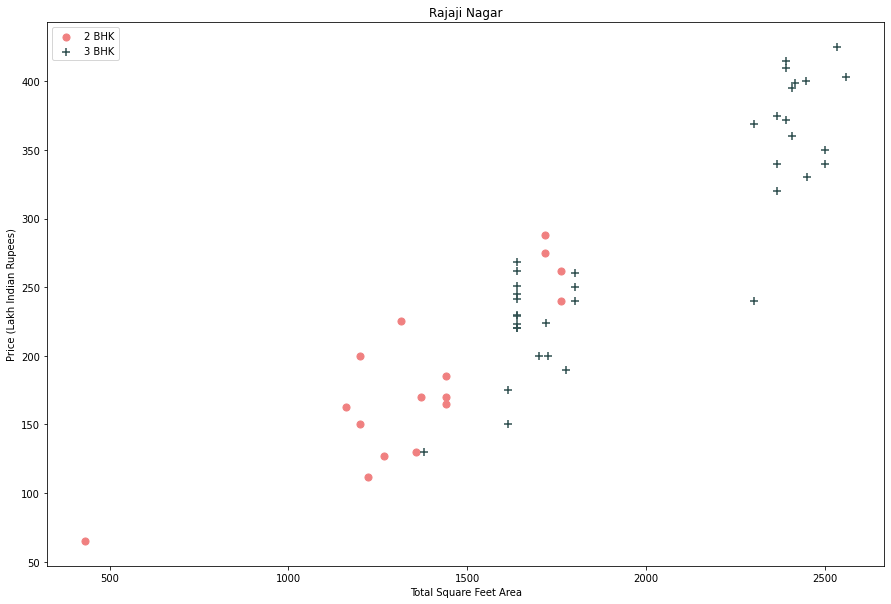

In [32]:
# Comparison of prices of 2BHK and 3BHK property prices

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='lightcoral',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='darkslategray',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df4,"Rajaji Nagar")
# You can change the name of location and check their respective scatterplot here

In [33]:
# Remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(5586, 10)

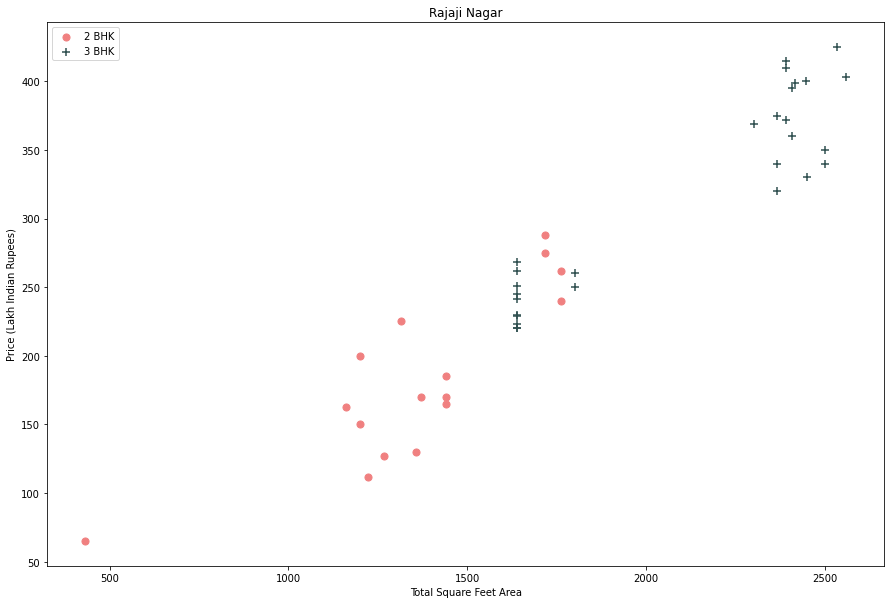

In [34]:
plot_scatter_chart(df5,"Rajaji Nagar")

Text(0, 0.5, 'Count')

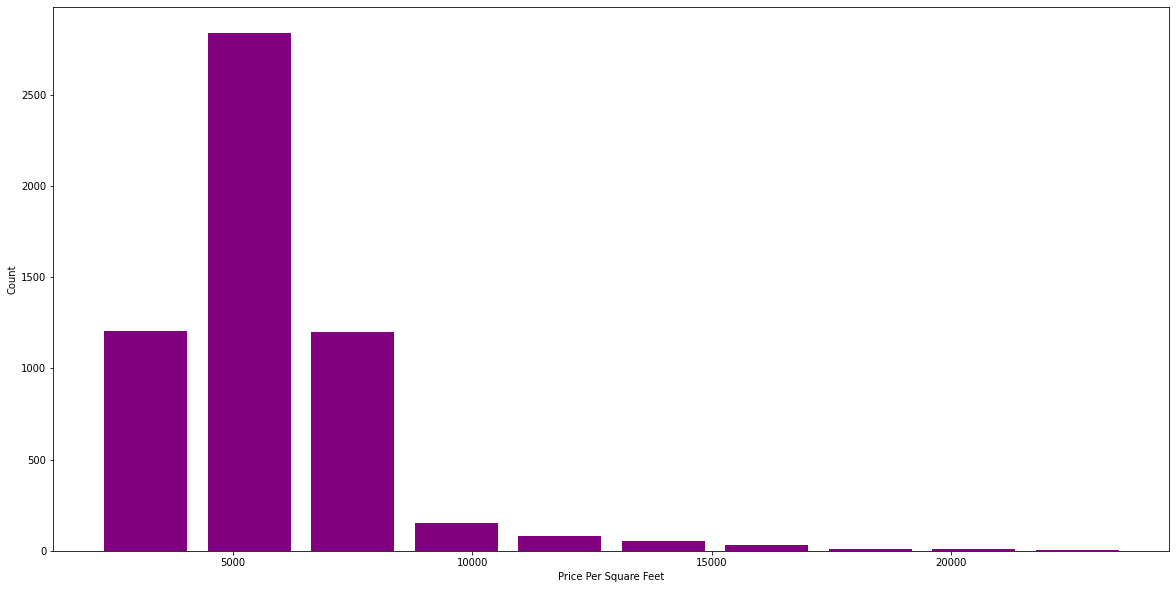

In [35]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft,rwidth=0.8, color = "purple")
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

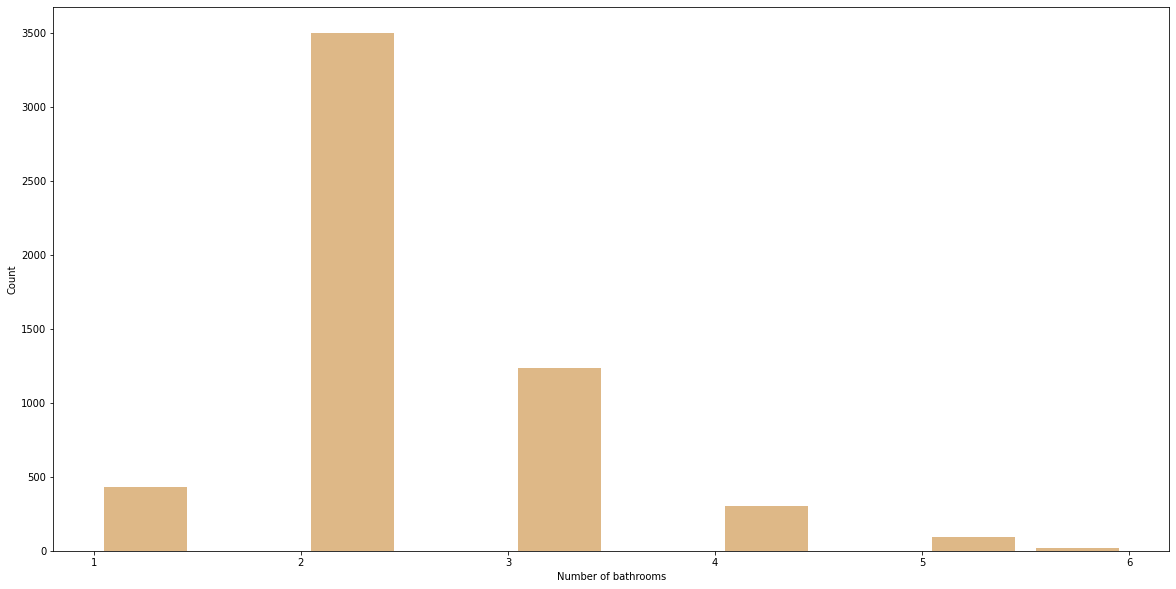

In [36]:
plt.hist(df5.bath,rwidth=0.8, color = "burlywood")
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [37]:
def LinearEquationPlot(df,location):
    xy = df[(df.location==location)]
    fig = plt.figure(figsize=(20,10))
    sns.regplot(x='total_sqft', y='price', data=xy,ci = 68)

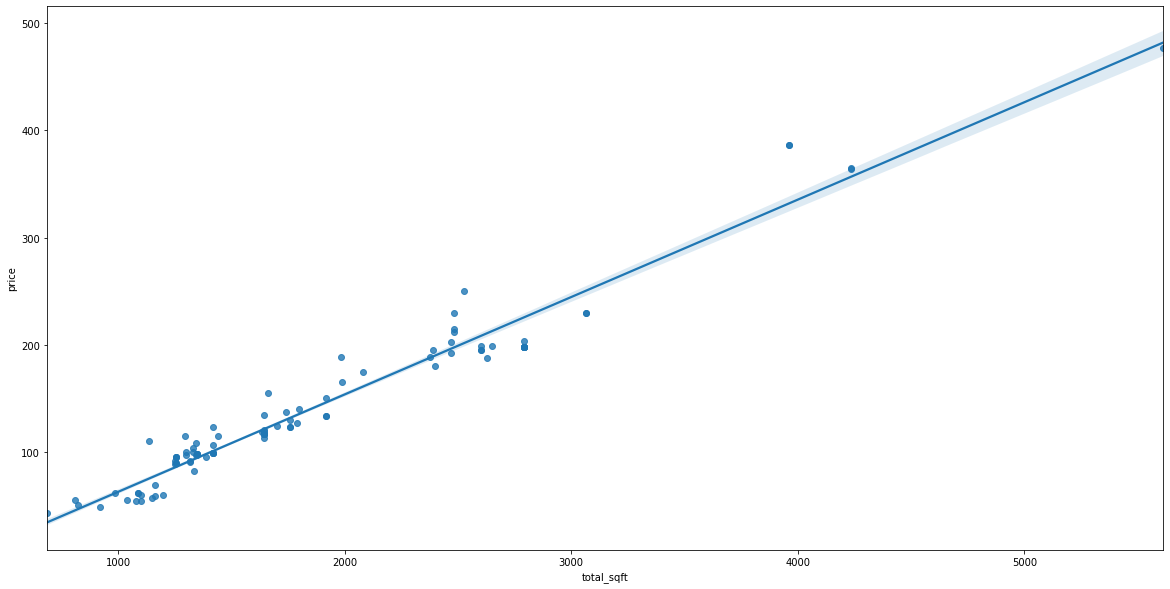

In [38]:
LinearEquationPlot(df5,'Hebbal')

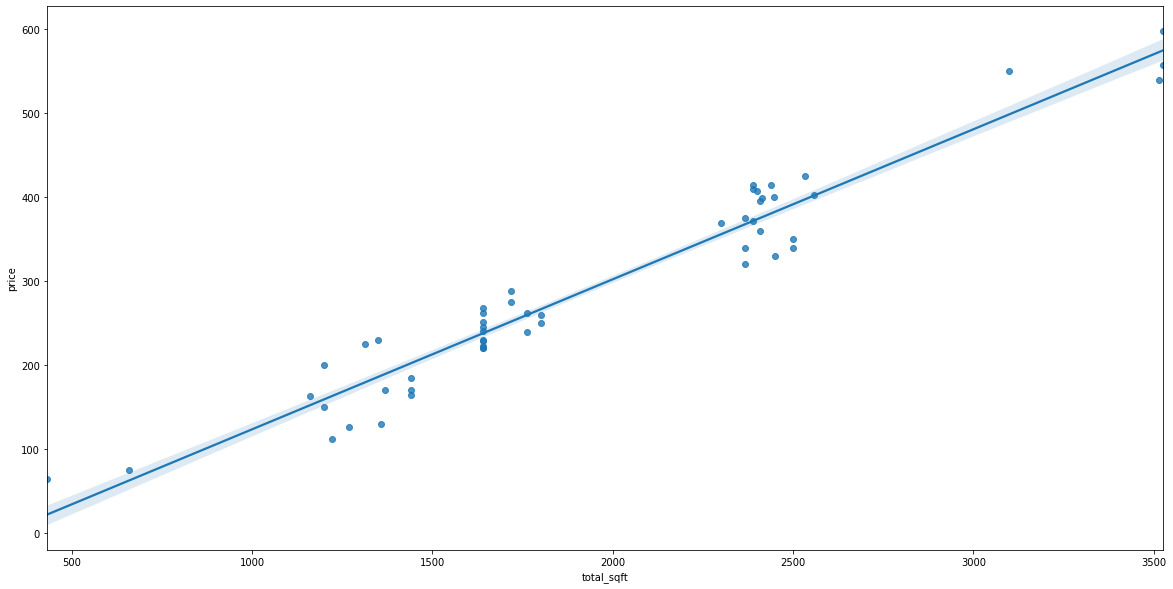

In [39]:
LinearEquationPlot(df5,'Rajaji Nagar')